# Khushdev Pandit
# Roll no: 2020211

# Downloading data

In [1]:
import gdown
url = 'https://drive.google.com/drive/folders/1eMPLhew1XrMo6mLHO8ySTv-n4Xydlui-?usp=sharing'
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/data/MNIST/raw/t10k-images-idx3-ubyte',
 '/content/data/MNIST/raw/t10k-images-idx3-ubyte.gz',
 '/content/data/MNIST/raw/t10k-labels-idx1-ubyte',
 '/content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz',
 '/content/data/MNIST/raw/train-images-idx3-ubyte',
 '/content/data/MNIST/raw/train-images-idx3-ubyte.gz',
 '/content/data/MNIST/raw/train-labels-idx1-ubyte',
 '/content/data/MNIST/raw/train-labels-idx1-ubyte.gz']

# Question 1

In [2]:
import os
import torch
import struct
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import MNIST

### Class for custom MNIST Dataset inherited from torch.utils.data.Dataset

In [3]:
class MNISTCustomDataset(Dataset):
    def __init__(self, root:str, train=True, transform=None, target_transform=None):
        self.root = root
        self.transform = transform
        self.target_transform = target_transform
        images_path = 'train-images-idx3-ubyte' if train else 't10k-images-idx3-ubyte'
        labels_path = 'train-labels-idx1-ubyte' if train else 't10k-labels-idx1-ubyte'
        images_path = os.path.join(self.root, images_path)
        labels_path = os.path.join(self.root, labels_path)
        f_image = open(images_path, 'rb')
        f_label = open(labels_path, 'rb')

        magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
        image_data = np.fromfile(f_image, dtype=np.uint8)
        magic_number, size = struct.unpack(">II", f_label.read(8))
        image_label = np.fromfile(f_label, dtype=np.uint8)

        self.images = torch.tensor(image_data, dtype=torch.float32).reshape((size, 1, row, column))
        self.labels = torch.tensor(image_label, dtype=torch.int64)
        self.length = size
        print('MNIST Custom Dataset Initialized...')
        print('MNIST Custom Dataset length: {}'.format(self.length))
        print('Dataset image shape: {}'.format(self.images.shape))
        print('Dataset label shape: {}\n'.format(self.labels.shape))

    def __getitem__(self, index):
        image, label = self.images[index], self.labels[index]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

    def __len__(self):
        return self.length

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

torch.Size([60000, 1, 28, 28]) torch.Size([60000])
torch.Size([4, 1, 28, 28]) torch.Size([4])
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.int64
tensor(4)


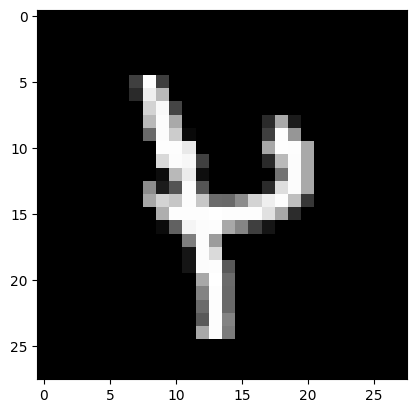

tensor(0)


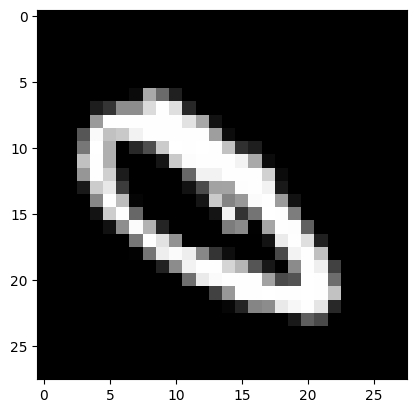

In [ ]:
# root = os.path.join(os.getcwd(), 'data', 'MNIST', 'raw')
root = './data/MNIST/raw/'

transform = transforms.Compose([
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomHorizontalFlip(0.5),
])
# mnist_custom_dataset = MNIST(root='data/', download=True, train=True, transform=transform)
mnist_custom_dataset = MNISTCustomDataset(root=root, train=True, transform=transform)
print(mnist_custom_dataset.images.shape, mnist_custom_dataset.labels.shape)

custom_dataloader = DataLoader(mnist_custom_dataset, batch_size=4, shuffle=True)
for images, labels in custom_dataloader:
    print(images.shape, labels.shape)
    print(type(images), type(labels))
    print(images.dtype, labels.dtype)
    print(labels[0])
    plt.imshow(images[0].reshape((28, 28)), cmap='gray');plt.show()
    print(labels[1])
    plt.imshow(images[1].reshape((28, 28)), cmap='gray');plt.show()
    break

### Class for Scratch MNIST Dataset & Dataloader

In [ ]:
class MNISTScratchDataset:
    def __init__(self, root:str, train=True):
        self.root = root
        images_path = 'train-images-idx3-ubyte' if train else 't10k-images-idx3-ubyte'
        labels_path = 'train-labels-idx1-ubyte' if train else 't10k-labels-idx1-ubyte'
        images_path = os.path.join(self.root, images_path)
        labels_path = os.path.join(self.root, labels_path)
        f_image = open(images_path, 'rb')
        f_label = open(labels_path, 'rb')

        magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
        image_data = np.fromfile(f_image, dtype=np.uint8)
        magic_number, size = struct.unpack(">II", f_label.read(8))
        image_label = np.fromfile(f_label, dtype=np.uint8)

        self.images = torch.tensor(image_data, dtype=torch.float32).reshape((size, 1, row, column))
        self.labels = torch.tensor(image_label, dtype=torch.int64)
        self.length = size
        print('MNIST Scratch Dataset Initialized...')
        print('MNIST Scratch Dataset length: {}'.format(self.length))
        print('Dataset image shape: {}'.format(self.images.shape))
        print('Dataset label shape: {}\n'.format(self.labels.shape))

    def __getitem__(self, index):
        image, label = self.images[index], self.labels[index]
        return image, label

    def __len__(self):
        return self.length

In [ ]:
class MNISTLoader:
    def __init__(self, data, batch_size, shuffle=False):
        self.data = data
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.n = len(self.data)
        self.shuffle_data()

    def shuffle_data(self):
        self.i = 0
        self.indices = torch.randperm(self.n) if self.shuffle else torch.arange(self.n)

    def __has_next__(self):
        return self.i < self.n

    def __iter__(self):
        self.shuffle_data()
        return self

    def __next__(self):
        if not self.__has_next__():
            raise StopIteration
        else:
            batch_indices = self.indices[self.i : self.i + self.batch_size]
            # Method-1
            # batch_images = []
            # batch_labels = []
            # for i in batch_indices:
            #     image, label = self.data[i]
            #     batch_images.append(image)
            #     batch_labels.append(label)
            # Method-2 (Applies same transform to all images in batch)
            # batch_images, batch_labels = self.data[batch_indices]
            # self.i += self.batch_size
            # return batch_images, batch_labels
            # Method-3
            batch_images, batch_labels = zip(*[self.data[i] for i in batch_indices])
            self.i += self.batch_size
            return torch.stack(batch_images), torch.stack(batch_labels)

MNIST Scratch Dataset Initialized...
MNIST Scratch Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

torch.Size([60000, 1, 28, 28]) torch.Size([60000])
torch.Size([64, 1, 28, 28]) torch.Size([64])
tensor(7)


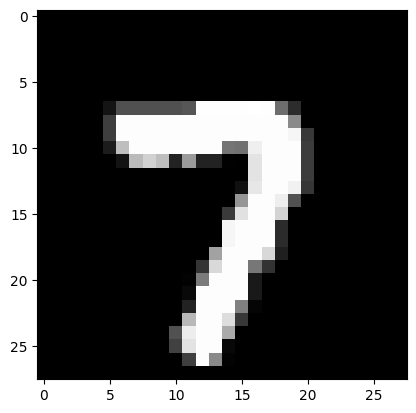

tensor(0)


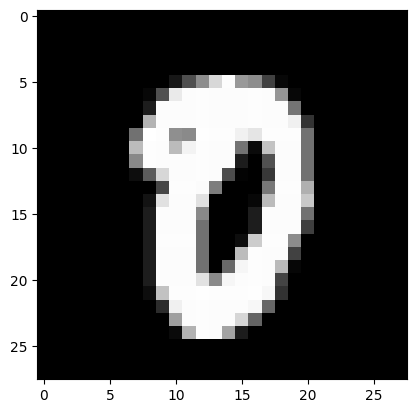

<class '__main__.MNISTLoader'>
tensor([ 9611, 53346, 34036,  ..., 32002, 26787, 48491])
tensor([26470, 31932, 12323,  ..., 38376, 32939, 28550])
tensor([ 5923, 16728,  2858,  ..., 23672,   625, 17860])
tensor([21927,  2487, 59450,  ..., 44184, 36681, 15326])
tensor([27453, 45181,  9599,  ..., 35058, 10905, 22023])
tensor([59088, 27200,  6820,  ..., 32764, 16921, 14193])
tensor([ 8801, 39714, 38076,  ..., 41059, 44027, 57907])
tensor([31422, 21287, 16154,  ..., 26769, 18708, 42038])
tensor([ 6678, 33061, 35968,  ..., 14389, 45479,  3438])
tensor([26977, 38369, 10913,  ..., 28724,  1160,  3690])


In [ ]:
root = './data/MNIST/raw/'
mnist_scratch_dataset = MNISTScratchDataset(root=root, train=True)
print(mnist_scratch_dataset.images.shape, mnist_scratch_dataset.labels.shape)
# print(mnist_scratch_dataset[0][1]); plt.imshow(mnist_scratch_dataset[0][0], cmap='gray'); plt.show()

# scratch_loader = DataLoader(mnist_scratch_dataset, batch_size=64, shuffle=True)
scratch_loader = MNISTLoader(mnist_scratch_dataset, batch_size=64, shuffle=True)

for images, labels in scratch_loader:
    print(images.shape, labels.shape)
    print(labels[0])
    plt.imshow(images[0][0], cmap='gray'); plt.show()
    print(labels[1])
    plt.imshow(images[1][0], cmap='gray'); plt.show()
    break

print(type(scratch_loader))
for i in range(10):
    for images, labels in scratch_loader:
        print(scratch_loader.indices)
        break

### Custom DataLoader performance

In [ ]:
def get_custom_loader_timings(data, batch_size=64, shuffle=False):
    import time
    custom_dataloader = DataLoader(data, batch_size=batch_size, shuffle=shuffle)
    batch_loading_time = []
    print(f'Calculating loading time for Batch-size={batch_size} and Shuffle={shuffle}')
    start_time = time.time()
    prev_time = start_time
    for img, label in custom_dataloader:
        curr_time = time.time()
        batch_loading_time.append(curr_time - prev_time)
        prev_time = curr_time

    total_loading_time = time.time() - start_time
    return batch_loading_time, total_loading_time

transform = transforms.Compose([
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomHorizontalFlip(),
])
mnist_dataset = MNISTCustomDataset(root=root, train=True, transform=None, target_transform=None)

cL_batchLoadingTime_b128, cL_totalLoadingTime_b128 = get_custom_loader_timings(mnist_dataset, batch_size=128)
cL_batchLoadingTime_b256, cL_totalLoadingTime_b256 = get_custom_loader_timings(mnist_dataset, batch_size=256)
cL_batchLoadingTime_b512, cL_totalLoadingTime_b512 = get_custom_loader_timings(mnist_dataset, batch_size=512)
cL_batchLoadingTime_b1024, cL_totalLoadingTime_b1024  = get_custom_loader_timings(mnist_dataset, batch_size=1024)

print('\nMean Batch Loading time for custom DataLoaders: ')
print(f'for batch Size 128: {np.mean(cL_batchLoadingTime_b128)}s')
print(f'for batch Size 256: {np.mean(cL_batchLoadingTime_b256)}s')
print(f'for batch Size 512: {np.mean(cL_batchLoadingTime_b512)}s')
print(f'for batch Size 1024: {np.mean(cL_batchLoadingTime_b1024)}s')

print('\nMedian Batch Loading time for custom DataLoaders: ')
print(f'for batch Size 128: {np.median(cL_batchLoadingTime_b128)}s')
print(f'for batch Size 256: {np.median(cL_batchLoadingTime_b256)}s')
print(f'for batch Size 512: {np.median(cL_batchLoadingTime_b512)}s')
print(f'for batch Size 1024: {np.median(cL_batchLoadingTime_b1024)}s')

print('\nStandard Deviation of Batch Loading time for custom DataLoaders: ')
print(f'for batch Size 128: {np.std(cL_batchLoadingTime_b128)}s')
print(f'for batch Size 256: {np.std(cL_batchLoadingTime_b256)}s')
print(f'for batch Size 512: {np.std(cL_batchLoadingTime_b512)}s')
print(f'for batch Size 1024: {np.std(cL_batchLoadingTime_b1024)}s')

print('\nTotal Loading time for custom DataLoaders: ')
print(f'for batch Size 128: {cL_totalLoadingTime_b128}s')
print(f'for batch Size 256: {cL_totalLoadingTime_b256}s')
print(f'for batch Size 512: {cL_totalLoadingTime_b512}s')
print(f'for batch Size 1024: {cL_totalLoadingTime_b1024}s')

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

Calculating loading time for Batch-size=128 and Shuffle=False
Calculating loading time for Batch-size=256 and Shuffle=False
Calculating loading time for Batch-size=512 and Shuffle=False
Calculating loading time for Batch-size=1024 and Shuffle=False

Mean Batch Loading time for custom DataLoaders: 
for batch Size 128: 0.0008399481458196253s
for batch Size 256: 0.0016771539728692238s
for batch Size 512: 0.004626019526336153s
for batch Size 1024: 0.006417488647719561s

Median Batch Loading time for custom DataLoaders: 
for batch Size 128: 0.0007965564727783203s
for batch Size 256: 0.0015935897827148438s
for batch Size 512: 0.0031644105911254883s
for batch Size 1024: 0.006246089935302734s

Standard Deviation of Batch Loading time for custom DataLoaders: 
for batch Size 128: 0.00020230442562127324s
for batch Size 256: 0.00033235

### Scratch DataLoader performance


In [ ]:
def get_scratch_loader_timings(data, batch_size=64, shuffle=False):
    import time
    scratch_loader = MNISTLoader(data, batch_size=batch_size, shuffle=shuffle)
    batch_loading_time = []
    print(f'Calculating loading time for Batch-size={batch_size} and Shuffle={shuffle}')
    start_time = time.time()
    prev_time = start_time
    for img, label in scratch_loader:
        curr_time = time.time()
        batch_loading_time.append(curr_time - prev_time)
        prev_time = curr_time

    total_loading_time = time.time() - start_time
    return batch_loading_time, total_loading_time

mnist_dataset = MNISTScratchDataset(root=root, train=True)

sL_batchLoadingTime_b128, sL_totalLoadingTime_b128 = get_scratch_loader_timings(mnist_dataset, 128)
sL_batchLoadingTime_b256, sL_totalLoadingTime_b256 = get_scratch_loader_timings(mnist_dataset, 256)
sL_batchLoadingTime_b512, sL_totalLoadingTime_b512 = get_scratch_loader_timings(mnist_dataset, 512)
sL_batchLoadingTime_b1024, sL_totalLoadingTime_b1024 = get_scratch_loader_timings(mnist_dataset, 1024)

print('\nMean Batch Loading time for scratch DataLoaders: ')
print(f'for batch Size 128: {np.mean(sL_batchLoadingTime_b128)}s')
print(f'for batch Size 256: {np.mean(sL_batchLoadingTime_b256)}s')
print(f'for batch Size 512: {np.mean(sL_batchLoadingTime_b512)}s')
print(f'for batch Size 1024: {np.mean(sL_batchLoadingTime_b1024)}s')

print('\nMedian Batch Loading time for scratch DataLoaders: ')
print(f'for batch Size 128: {np.median(sL_batchLoadingTime_b128)}s')
print(f'for batch Size 256: {np.median(sL_batchLoadingTime_b256)}s')
print(f'for batch Size 512: {np.median(sL_batchLoadingTime_b512)}s')
print(f'for batch Size 1024: {np.median(sL_batchLoadingTime_b1024)}s')

print('\nStandard Deviation of Batch Loading time for scratch DataLoaders: ')
print(f'for batch Size 128: {np.std(sL_batchLoadingTime_b128)}s')
print(f'for batch Size 256: {np.std(sL_batchLoadingTime_b256)}s')
print(f'for batch Size 512: {np.std(sL_batchLoadingTime_b512)}s')
print(f'for batch Size 1024: {np.std(sL_batchLoadingTime_b1024)}s')

print('\nTotal Loading time for scratch DataLoaders: ')
print(f'for batch Size 128: {sL_totalLoadingTime_b128}s')
print(f'for batch Size 256: {sL_totalLoadingTime_b256}s')
print(f'for batch Size 512: {sL_totalLoadingTime_b512}s')
print(f'for batch Size 1024: {sL_totalLoadingTime_b1024}s')

MNIST Scratch Dataset Initialized...
MNIST Scratch Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

Calculating loading time for Batch-size=128 and Shuffle=False
Calculating loading time for Batch-size=256 and Shuffle=False
Calculating loading time for Batch-size=512 and Shuffle=False
Calculating loading time for Batch-size=1024 and Shuffle=False

Mean Batch Loading time for scratch DataLoaders: 
for batch Size 128: 0.0010889156032472785s
for batch Size 256: 0.002158319189193401s
for batch Size 512: 0.005508544081348484s
for batch Size 1024: 0.008498232243424756s

Median Batch Loading time for scratch DataLoaders: 
for batch Size 128: 0.0010237693786621094s
for batch Size 256: 0.002084493637084961s
for batch Size 512: 0.004175662994384766s
for batch Size 1024: 0.00829315185546875s

Standard Deviation of Batch Loading time for scratch DataLoaders: 
for batch Size 128: 0.00021396604920232608s
for batch Size 256: 0.0003037

### Comparing Performance of Loading time v/s Batch size on Custom DataLoader and Scratch DataLoader without shuffling

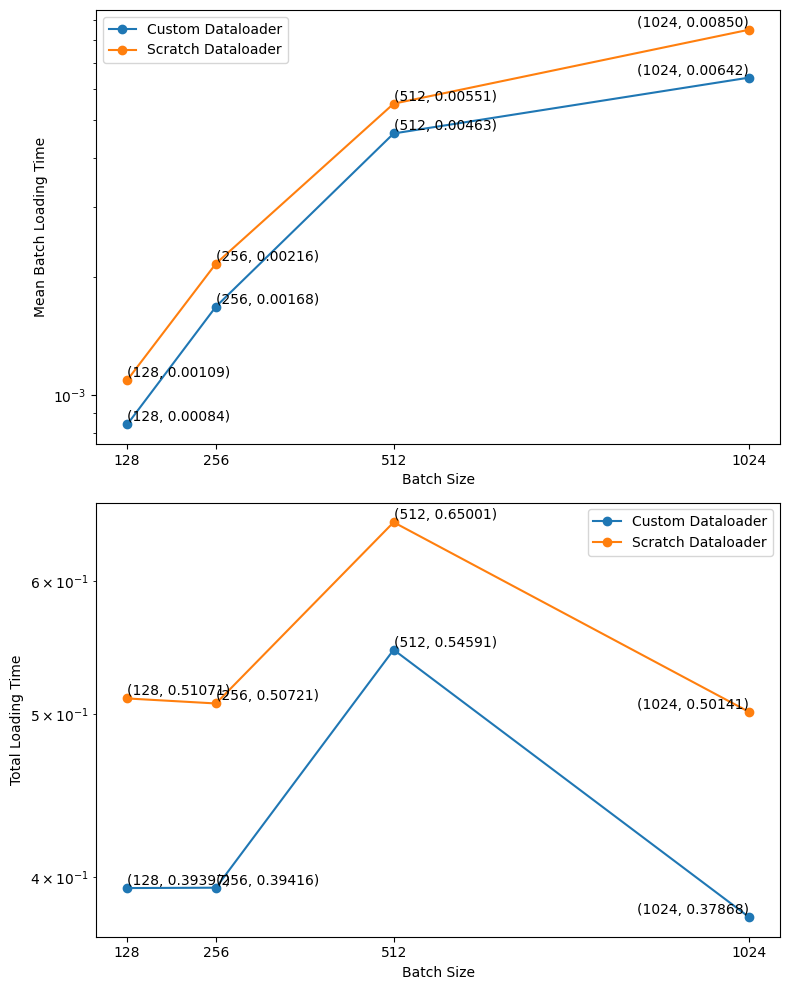

In [ ]:
batch_sizes = [128, 256, 512, 1024]
cL_meanBatchLoadingTime = [np.mean(cL_batchLoadingTime_b128), np.mean(cL_batchLoadingTime_b256),
                            np.mean(cL_batchLoadingTime_b512), np.mean(cL_batchLoadingTime_b1024)]
sL_meanBatchLoadingTime = [np.mean(sL_batchLoadingTime_b128), np.mean(sL_batchLoadingTime_b256),
                            np.mean(sL_batchLoadingTime_b512), np.mean(sL_batchLoadingTime_b1024)]
cL_totalLoadingTime = [cL_totalLoadingTime_b128, cL_totalLoadingTime_b256,
                        cL_totalLoadingTime_b512, cL_totalLoadingTime_b1024]
sL_totalLoadingTime = [sL_totalLoadingTime_b128, sL_totalLoadingTime_b256,
                        sL_totalLoadingTime_b512, sL_totalLoadingTime_b1024]

fig = plt.figure(figsize=(8, 10))
has = ['left', 'left', 'left', 'right']
vas = ['bottom', 'bottom', 'bottom', 'bottom']

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(batch_sizes, cL_meanBatchLoadingTime, label='Custom Dataloader', marker='o')
ax1.plot(batch_sizes, sL_meanBatchLoadingTime, label='Scratch Dataloader', marker='o')
# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks(batch_sizes)
for x, y in zip(batch_sizes, cL_meanBatchLoadingTime):
    ax1.text(x, y, '({}, {:.5f})'.format(x, y), ha=has[batch_sizes.index(x)], va=vas[batch_sizes.index(x)])
for x, y in zip(batch_sizes, sL_meanBatchLoadingTime):
    ax1.text(x, y, '({}, {:.5f})'.format(x, y), ha=has[batch_sizes.index(x)], va=vas[batch_sizes.index(x)])
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Mean Batch Loading Time')
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(batch_sizes, cL_totalLoadingTime, label='Custom Dataloader', marker='o')
ax2.plot(batch_sizes, sL_totalLoadingTime, label='Scratch Dataloader', marker='o')
# ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xticks(batch_sizes)
for x, y in zip(batch_sizes, cL_totalLoadingTime):
    ax2.text(x, y, '({}, {:.5f})'.format(x, y), ha=has[batch_sizes.index(x)], va=vas[batch_sizes.index(x)])
for x, y in zip(batch_sizes, sL_totalLoadingTime):
    ax2.text(x, y, '({}, {:.5f})'.format(x, y), ha=has[batch_sizes.index(x)], va=vas[batch_sizes.index(x)])
ax2.set_xlabel('Batch Size')
ax2.set_ylabel('Total Loading Time')
ax2.legend()
plt.tight_layout()
plt.show()

### Comparing Performance of Loading time v/s Batch size on Custom DataLoader and Scratch DataLoader with shuffling

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

Calculating loading time for Batch-size=128 and Shuffle=True
Calculating loading time for Batch-size=256 and Shuffle=True
Calculating loading time for Batch-size=512 and Shuffle=True
Calculating loading time for Batch-size=1024 and Shuffle=True

MNIST Scratch Dataset Initialized...
MNIST Scratch Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

Calculating loading time for Batch-size=128 and Shuffle=True
Calculating loading time for Batch-size=256 and Shuffle=True
Calculating loading time for Batch-size=512 and Shuffle=True
Calculating loading time for Batch-size=1024 and Shuffle=True


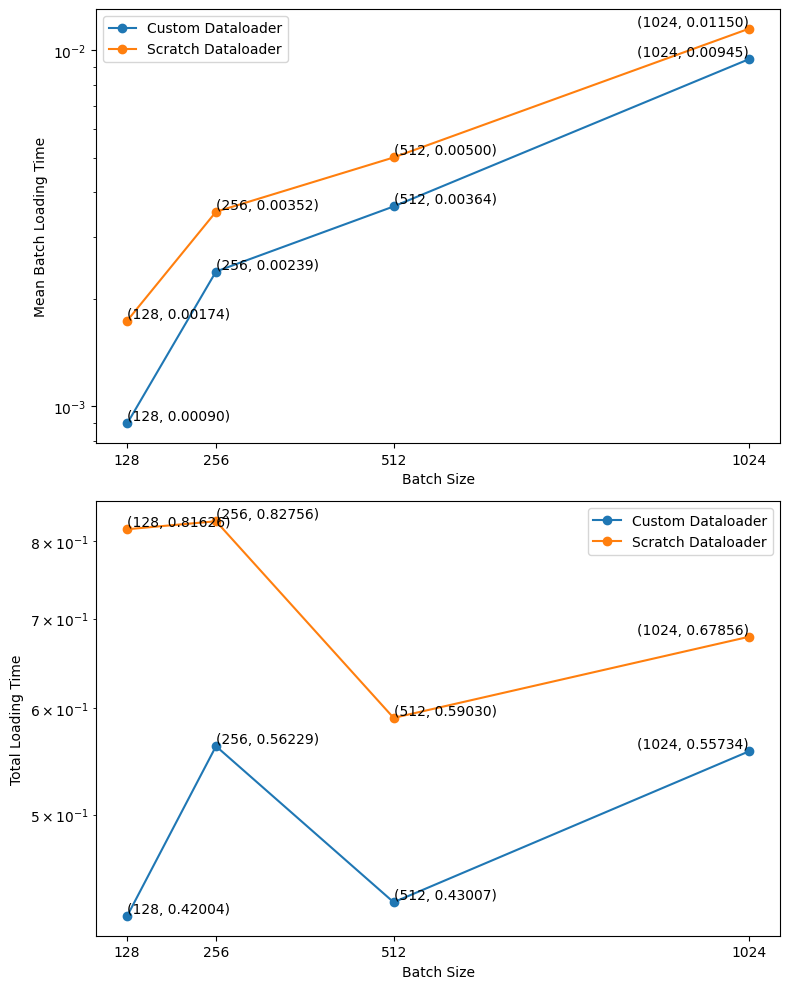

In [ ]:
transform = transforms.Compose([
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomHorizontalFlip()
])
# mnist_custom_dataset = MNIST(root='data/', download=True, train=True, transform=transform)
mnist_custom_dataset = MNISTCustomDataset(root=root, train=True, transform=None)

cL_batchLoadingTime_b128, cL_totalLoadingTime_b128 = get_custom_loader_timings(mnist_custom_dataset, batch_size=128, shuffle=True)
cL_batchLoadingTime_b256, cL_totalLoadingTime_b256 = get_custom_loader_timings(mnist_custom_dataset, batch_size=256, shuffle=True)
cL_batchLoadingTime_b512, cL_totalLoadingTime_b512 = get_custom_loader_timings(mnist_custom_dataset, batch_size=512, shuffle=True)
cL_batchLoadingTime_b1024, cL_totalLoadingTime_b1024  = get_custom_loader_timings(mnist_custom_dataset, batch_size=1024, shuffle=True)
print()

mnist_scratch_dataset = MNISTScratchDataset(root=root, train=True)
sL_batchLoadingTime_b128, sL_totalLoadingTime_b128 = get_scratch_loader_timings(mnist_scratch_dataset, batch_size=128, shuffle=True)
sL_batchLoadingTime_b256, sL_totalLoadingTime_b256 = get_scratch_loader_timings(mnist_scratch_dataset, batch_size=256, shuffle=True)
sL_batchLoadingTime_b512, sL_totalLoadingTime_b512 = get_scratch_loader_timings(mnist_scratch_dataset, batch_size=512, shuffle=True)
sL_batchLoadingTime_b1024, sL_totalLoadingTime_b1024 = get_scratch_loader_timings(mnist_scratch_dataset, batch_size=1024, shuffle=True)


batch_sizes = [128, 256, 512, 1024]
cL_meanBatchLoadingTime = [np.mean(cL_batchLoadingTime_b128), np.mean(cL_batchLoadingTime_b256),
                            np.mean(cL_batchLoadingTime_b512), np.mean(cL_batchLoadingTime_b1024)]
sL_meanBatchLoadingTime = [np.mean(sL_batchLoadingTime_b128), np.mean(sL_batchLoadingTime_b256),
                            np.mean(sL_batchLoadingTime_b512), np.mean(sL_batchLoadingTime_b1024)]
cL_totalLoadingTime = [cL_totalLoadingTime_b128, cL_totalLoadingTime_b256,
                        cL_totalLoadingTime_b512, cL_totalLoadingTime_b1024]
sL_totalLoadingTime = [sL_totalLoadingTime_b128, sL_totalLoadingTime_b256,
                        sL_totalLoadingTime_b512, sL_totalLoadingTime_b1024]

fig = plt.figure(figsize=(8, 10))
has = ['left', 'left', 'left', 'right']
vas = ['bottom', 'bottom', 'bottom', 'bottom']

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(batch_sizes, cL_meanBatchLoadingTime, label='Custom Dataloader', marker='o')
ax1.plot(batch_sizes, sL_meanBatchLoadingTime, label='Scratch Dataloader', marker='o')
# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks(batch_sizes)
for x, y in zip(batch_sizes, cL_meanBatchLoadingTime):
    ax1.text(x, y, '({}, {:.5f})'.format(x, y), ha=has[batch_sizes.index(x)], va=vas[batch_sizes.index(x)])
for x, y in zip(batch_sizes, sL_meanBatchLoadingTime):
    ax1.text(x, y, '({}, {:.5f})'.format(x, y), ha=has[batch_sizes.index(x)], va=vas[batch_sizes.index(x)])
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Mean Batch Loading Time')
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(batch_sizes, cL_totalLoadingTime, label='Custom Dataloader', marker='o')
ax2.plot(batch_sizes, sL_totalLoadingTime, label='Scratch Dataloader', marker='o')
# ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xticks(batch_sizes)
for x, y in zip(batch_sizes, cL_totalLoadingTime):
    ax2.text(x, y, '({}, {:.5f})'.format(x, y), ha=has[batch_sizes.index(x)], va=vas[batch_sizes.index(x)])
for x, y in zip(batch_sizes, sL_totalLoadingTime):
    ax2.text(x, y, '({}, {:.5f})'.format(x, y), ha=has[batch_sizes.index(x)], va=vas[batch_sizes.index(x)])
ax2.set_xlabel('Batch Size')
ax2.set_ylabel('Total Loading Time')
ax2.legend()
plt.tight_layout()
plt.show()

# Question-2

### Network architecture

In [ ]:
import torch
import time
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt


class MLP(nn.Module):
    def __init__(self, in_features:int=28*28, out_features:int=10):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=in_features, out_features=512, bias=True)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=512, out_features=256, bias=True)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=256, out_features=128, bias=True)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(in_features=128, out_features=64, bias=True)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(in_features=64, out_features=out_features, bias=True)
        self.relu5 = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        logits = self.fc5(x)
        # probas = self.softmax(logits)
        return logits

### Initialize Dataset and DataLoaders

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

# Creating training and test datasets
root = './data/MNIST/raw/'
train_dataset = MNISTCustomDataset(root=root, train=True, transform=None)
test_dataset = MNISTCustomDataset(root=root, train=False, transform=None)

# splitting of training and validation set
batch_size = 128
valid_size = 0.1
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, shuffle=False)
valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Train Dataset Length: {}'.format(len(train_sampler)))
print('Validation Dataset Length: {}'.format(len(valid_sampler)))
print('Test Dataset Length: {}\n'.format(len(test_dataset)))

for images, labels in train_loader:
    print(images.shape, labels.shape)
    print(type(images), type(labels))
    print(images.dtype, labels.dtype)
    break

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 10000
Dataset image shape: torch.Size([10000, 1, 28, 28])
Dataset label shape: torch.Size([10000])

Train Dataset Length: 54000
Validation Dataset Length: 6000
Test Dataset Length: 10000

torch.Size([128, 1, 28, 28]) torch.Size([128])
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.int64


### Initialize the model and other parameters

In [ ]:
# Initialize the model
model = MLP()

# Define the loss function and optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Training of the model

In [ ]:
# Training loop
def train_q2(model:nn.Module, train_loader:DataLoader, optimizer, criterion):
    model.train()
    model = model.to(device)
    train_loss = 0.0
    correct = 0
    total = 0
    batch = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        batch_correct = (predicted == labels).sum().item()
        correct += batch_correct

        if (batch + 1) % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(images)
            print(f"Batch Loss: {loss:>7f},  Batch Accuracy: {100*batch_correct/len(images):.2f}   [{current:>5d}/{len(train_sampler):>5d}]")
        batch += 1

    accuracy = 100 * correct / total
    train_loss = train_loss / len(train_loader)
    print(f"Training performance: \n Accuracy: {accuracy:>0.1f}%, Loss: {train_loss:>8f}")
    return train_loss, accuracy


# Validation loop
def validate_q2(model:nn.Module, valid_loader:DataLoader, loss_fn):
    model.eval()
    model = model.to(device)
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss += loss_fn(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    val_loss = val_loss / len(valid_loader)
    print(f"Validation performance: \n Accuracy: {accuracy:>0.1f}%, Loss: {val_loss:>8f}")
    return val_loss, accuracy


# Testing loop
def test_q2(model:nn.Module, test_loader:DataLoader, loss_fn):
    model.eval()
    model = model.to(device)
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            test_loss += loss_fn(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_loss = test_loss / len(test_loader)
    print(f"Test performance: \n Accuracy: {accuracy:>0.1f}%, Loss: {test_loss:>8f} \n")
    return test_loss, accuracy


# Training, Validation and Testing of the model
num_epochs = 60
train_losses_q2, train_accuracies_q2 = [], []
val_losses_q2, val_accuracies_q2 = [], []
test_losses_q2, test_accuracies_q2 = [], []
start_time = time.time()

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loss, train_accuracy = train_q2(model, train_loader, optimizer, criterion)
    val_loss, val_accuracy = validate_q2(model, valid_loader, criterion)
    test_loss, test_accuracy = test_q2(model, test_loader, criterion)

    train_losses_q2.append(train_loss)
    train_accuracies_q2.append(train_accuracy)
    val_losses_q2.append(val_loss)
    val_accuracies_q2.append(val_accuracy)
    test_losses_q2.append(test_loss)
    test_accuracies_q2.append(test_accuracy)

end_time = time.time()
print(f"Time taken to train the model: {(end_time - start_time) / 60} minutes")

Epoch 1
-------------------------------
Batch Loss: 2.600966,  Batch Accuracy: 14.06   [ 1280/54000]
Batch Loss: 2.352406,  Batch Accuracy: 8.59   [ 2560/54000]
Batch Loss: 2.244392,  Batch Accuracy: 23.44   [ 3840/54000]
Batch Loss: 1.951872,  Batch Accuracy: 33.59   [ 5120/54000]
Batch Loss: 1.998807,  Batch Accuracy: 30.47   [ 6400/54000]
Batch Loss: 1.932410,  Batch Accuracy: 40.62   [ 7680/54000]
Batch Loss: 1.829032,  Batch Accuracy: 43.75   [ 8960/54000]
Batch Loss: 1.698252,  Batch Accuracy: 46.88   [10240/54000]
Batch Loss: 1.629406,  Batch Accuracy: 48.44   [11520/54000]
Batch Loss: 1.504729,  Batch Accuracy: 58.59   [12800/54000]
Batch Loss: 1.386296,  Batch Accuracy: 61.72   [14080/54000]
Batch Loss: 1.445437,  Batch Accuracy: 54.69   [15360/54000]
Batch Loss: 1.471027,  Batch Accuracy: 57.03   [16640/54000]
Batch Loss: 1.229615,  Batch Accuracy: 71.88   [17920/54000]
Batch Loss: 1.224973,  Batch Accuracy: 68.75   [19200/54000]
Batch Loss: 1.229690,  Batch Accuracy: 67.19  

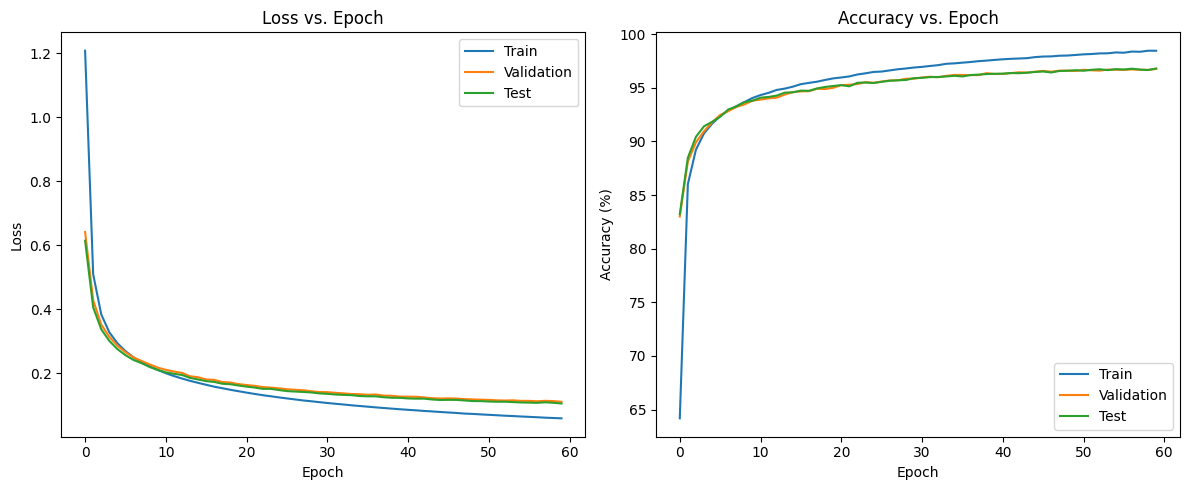

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses_q2, label='Train')
plt.plot(range(num_epochs), val_losses_q2, label='Validation')
plt.plot(range(num_epochs), test_losses_q2, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies_q2, label='Train')
plt.plot(range(num_epochs), val_accuracies_q2, label='Validation')
plt.plot(range(num_epochs), test_accuracies_q2, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Question-3

### Imports

In [ ]:
import torch
import math
import time
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from typing import List

### Classes for Activation Functions

In [ ]:
class SoftMax:
    def __init__(self):
        self.activation = None

    def forward(self, x:torch.tensor):
        self.activation = torch.exp(x) / torch.sum(torch.exp(x), dim=1, keepdim=True)
        return self.activation

    def backward(self, x:torch.tensor):
        x = self.activation
        # x = torch.exp(x) / torch.sum(torch.exp(x))
        return torch.diag_embed(x) - torch.bmm(x.unsqueeze(-1), x.unsqueeze(1))

class ReLU:
    def __init__(self):
        self.activation = None

    def forward(self, x:torch.tensor):
        self.activation = torch.max(torch.zeros_like(x), x)
        return self.activation

    def backward(self, x:torch.tensor):
        return torch.where(x >= 0, torch.ones_like(x), torch.zeros_like(x))

class TanH:
    def __init__(self):
        self.activation = None

    def forward(self, x:torch.tensor):
        self.activation = torch.tanh(x)
        return self.activation

    def backward(self, x:torch.tensor):
        return 1 - torch.pow(self.activation, 2)

class Sigmoid:
    def __init__(self):
        self.activation = None

    def forward(self, x:torch.tensor):
        self.activation = torch.sigmoid(x)
        return self.activation

    def backward(self, x:torch.tensor):
        return self.activation * (1 - self.activation)

### Class for Linear Layers

In [ ]:
class Linear:
    def __init__(self, in_features, out_features, bias=True, device:str='cpu'):
        self.in_features = in_features
        self.out_features = out_features
        self.weights = torch.randn((out_features, in_features), device=device).div_(math.sqrt(in_features + out_features))
        self.bias = torch.randn((out_features, 1), device=device).div_(math.sqrt(in_features + out_features)) if bias else None
        self.grad_weights = torch.zeros_like(self.weights, device=device)
        self.grad_bias = torch.zeros_like(self.bias, device=device) if bias else None
        self.z = torch.zeros((out_features, 1), device=device)
        self.error_output = torch.zeros((out_features, 1), device=device)

    def forward(self, x):
        self.z = torch.matmul(x, self.weights.t())
        if self.bias is not None:
            self.z += self.bias.t()
        return self.z

    def backward(self, activation_value_prevlayer:torch.tensor):
        self.grad_weights = torch.matmul(self.error_output.t(), activation_value_prevlayer)
        if self.bias is not None:
            self.grad_bias = torch.sum(self.error_output, dim=0, keepdim=True).t()


### Class for Neural Network

In [ ]:
class NeuralNetwork:
    def __init__(self, in_features=28*28, out_features=10, device:str='cpu'):
        self.in_features = in_features
        self.out_features = out_features
        self.device = device
        self.fc1 = Linear(in_features, 512, device=device)
        self.relu1 = ReLU()
        self.fc2 = Linear(512, 256, device=device)
        self.relu2 = ReLU()
        self.fc3 = Linear(256, 128, device=device)
        self.relu3 = ReLU()
        self.fc4 = Linear(128, 64, device=device)
        self.relu4 = ReLU()
        self.fc5 = Linear(64, out_features, device=device)
        self.softmax = SoftMax()
        self.parameters = [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5]
        self.input_features = None

    def forward(self, x:torch.Tensor):
        self.input_features = x.clone()
        x = self.fc1.forward(x)
        x = self.relu1.forward(x)
        x = self.fc2.forward(x)
        x = self.relu2.forward(x)
        x = self.fc3.forward(x)
        x = self.relu3.forward(x)
        x = self.fc4.forward(x)
        x = self.relu4.forward(x)
        x = self.fc5.forward(x)
        x = self.softmax.forward(x)
        return x

    def backward(self, true_labels:torch.tensor):
        true_labels = torch.zeros((true_labels.size(0), 10), device=self.device).scatter_(1, true_labels.view(-1, 1), 1)
        self.fc5.error_output = torch.matmul(self.softmax.backward(self.fc5.z), (true_labels - self.softmax.activation).unsqueeze(-1)).squeeze(-1)
        self.fc5.backward(self.relu4.activation)
        self.fc4.error_output = self.relu4.backward(self.fc4.z) * torch.matmul(self.fc5.error_output, self.fc5.weights)
        self.fc4.backward(self.relu3.activation)
        self.fc3.error_output = self.relu3.backward(self.fc3.z) * torch.matmul(self.fc4.error_output, self.fc4.weights)
        self.fc3.backward(self.relu2.activation)
        self.fc2.error_output = self.relu2.backward(self.fc2.z) * torch.matmul(self.fc3.error_output, self.fc3.weights)
        self.fc2.backward(self.relu1.activation)
        self.fc1.error_output = self.relu1.backward(self.fc1.z) * torch.matmul(self.fc2.error_output, self.fc2.weights)
        self.fc1.backward(self.input_features)


### Class for Cross-Entropy Loss & SGD Optimizer


In [ ]:
class CrossEntropyLoss:
    def forward(self, output:torch.tensor, labels:torch.tensor, use_softmax=False):
        if use_softmax:
            output = SoftMax().forward(output)
        loss = -torch.sum(torch.log(output.gather(1, labels.unsqueeze(1)))) / labels.size(0)
        return loss

    def backward(self, model, true_labels:torch.tensor):
        model.backward(true_labels)


class SGD:
    def __init__(self, parameters, lr=0.0003):
        self.parameters = parameters
        self.lr = lr

    def step(self):
        for layer in self.parameters:
            layer.weights += self.lr * layer.grad_weights
            if layer.bias is not None:
                layer.bias += self.lr * layer.grad_bias

    def zero_grad(self):
        for layer in self.parameters:
            layer.grad_weights.zero_()
            if layer.bias is not None:
                layer.grad_bias.zero_()

### Initialize Dataset and DataLoaders

In [ ]:
# Creating training and test datasets
root = './data/MNIST/raw/'
train_dataset = MNISTCustomDataset(root=root, train=True, transform=None)
test_dataset = MNISTCustomDataset(root=root, train=False, transform=None)

# splitting of training and validation set
batch_size = 128
valid_size = 0.1
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, shuffle=False)
valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Train Dataset Length: {}'.format(len(train_sampler)))
print('Validation Dataset Length: {}'.format(len(valid_sampler)))
print('Test Dataset Length: {}\n'.format(len(test_dataset)))

for images, labels in train_loader:
    print(images.shape, labels.shape)
    print(type(images), type(labels))
    print(images.dtype, labels.dtype)
    break

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 10000
Dataset image shape: torch.Size([10000, 1, 28, 28])
Dataset label shape: torch.Size([10000])

Train Dataset Length: 54000
Validation Dataset Length: 6000
Test Dataset Length: 10000

torch.Size([128, 1, 28, 28]) torch.Size([128])
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.int64


### Intialize Custom Model, Loss and Optimizer  

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model_custom = NeuralNetwork(in_features=28*28, out_features=10, device=device)
sgd_optimizer = SGD(model_custom.parameters, lr=0.0003)
ce_loss = CrossEntropyLoss()

cuda:0


### Training of Model

In [ ]:
# Training loop
def train_Q3(model_custom:NeuralNetwork, train_loader:DataLoader, sgd_optimizer:SGD, ce_loss:CrossEntropyLoss):
    train_loss = 0.0
    correct = 0
    total = 0
    batch = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        sgd_optimizer.zero_grad()
        images = images.view(images.size(0), -1)
        output = model_custom.forward(images)
        loss = ce_loss.forward(output, labels)
        ce_loss.backward(model_custom, labels)
        sgd_optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(output, 1)
        batch_correct = (predicted == labels).sum().item()
        total += labels.size(0)
        correct += batch_correct
        batch_accuracy = 100 * batch_correct / len(images)
        if (batch + 1) % 10 == 0:
            current = (batch + 1) * len(images)
            print(f"Batch loss: {loss.item():>7f},  Batch Accuracy: {batch_accuracy:>0.2f}  [{current:>5d}/{len(train_sampler):>5d}]")
        batch += 1

    accuracy = 100 * correct / total
    train_loss /= len(train_loader)
    print(f"Training performance:\n Accuracy: {accuracy:.2f}%, Loss: {train_loss:.4f}")
    return train_loss, accuracy

# Validation loop
def validate_Q3(model_custom:NeuralNetwork, valid_loader:DataLoader, ce_loss:CrossEntropyLoss):
    val_loss = 0.0
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)
        output = model_custom.forward(images)
        loss = ce_loss.forward(output, labels)
        val_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    val_loss /= len(valid_loader)
    print(f"Validation performance:\n Accuracy: {accuracy:.2f}%, Loss: {val_loss:.4f}")
    return val_loss, accuracy

# Testing loop
def test_Q3(model_custom:NeuralNetwork, test_loader:DataLoader, ce_loss:CrossEntropyLoss):
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)
        output = model_custom.forward(images)
        loss = ce_loss.forward(output, labels)
        test_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss /= len(test_loader)
    print(f"Test performance: Accuracy:\n {accuracy:.2f}%, Loss: {test_loss:.4f}")
    return test_loss, accuracy

# Training, Validation, and Testing of the model_custom
train_losses_q3, train_accuracies_q3 = [], []
val_losses_q3, val_accuracies_q3 = [], []
test_losses_q3, test_accuracies_q3 = [], []
start_time = time.time()
num_epochs = 60
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}")
    train_loss, train_acc = train_Q3(model_custom, train_loader, sgd_optimizer, ce_loss)
    val_loss, val_acc = validate_Q3(model_custom, valid_loader, ce_loss)
    test_loss, test_acc = test_Q3(model_custom, test_loader, ce_loss)

    train_losses_q3.append(train_loss)
    train_accuracies_q3.append(train_acc)
    val_losses_q3.append(val_loss)
    val_accuracies_q3.append(val_acc)
    test_losses_q3.append(test_loss)
    test_accuracies_q3.append(test_acc)

end_time = time.time()
print(f'Total time taken to Train: {(end_time - start_time) / 60} mins')

Epoch 1
Batch loss: 22.427891,  Batch Accuracy: 13.28  [ 1280/54000]
Batch loss: 10.905039,  Batch Accuracy: 17.19  [ 2560/54000]
Batch loss: 4.111708,  Batch Accuracy: 46.88  [ 3840/54000]
Batch loss: 2.140844,  Batch Accuracy: 58.59  [ 5120/54000]
Batch loss: 1.244059,  Batch Accuracy: 70.31  [ 6400/54000]
Batch loss: 1.004127,  Batch Accuracy: 71.09  [ 7680/54000]
Batch loss: 0.774948,  Batch Accuracy: 81.25  [ 8960/54000]
Batch loss: 0.699553,  Batch Accuracy: 85.16  [10240/54000]
Batch loss: 0.585437,  Batch Accuracy: 83.59  [11520/54000]
Batch loss: 0.261870,  Batch Accuracy: 92.97  [12800/54000]
Batch loss: 0.626210,  Batch Accuracy: 83.59  [14080/54000]
Batch loss: 0.687861,  Batch Accuracy: 85.16  [15360/54000]
Batch loss: 0.557726,  Batch Accuracy: 79.69  [16640/54000]
Batch loss: 0.572531,  Batch Accuracy: 86.72  [17920/54000]
Batch loss: 0.378947,  Batch Accuracy: 89.84  [19200/54000]
Batch loss: 0.308074,  Batch Accuracy: 91.41  [20480/54000]
Batch loss: 0.325601,  Batch A

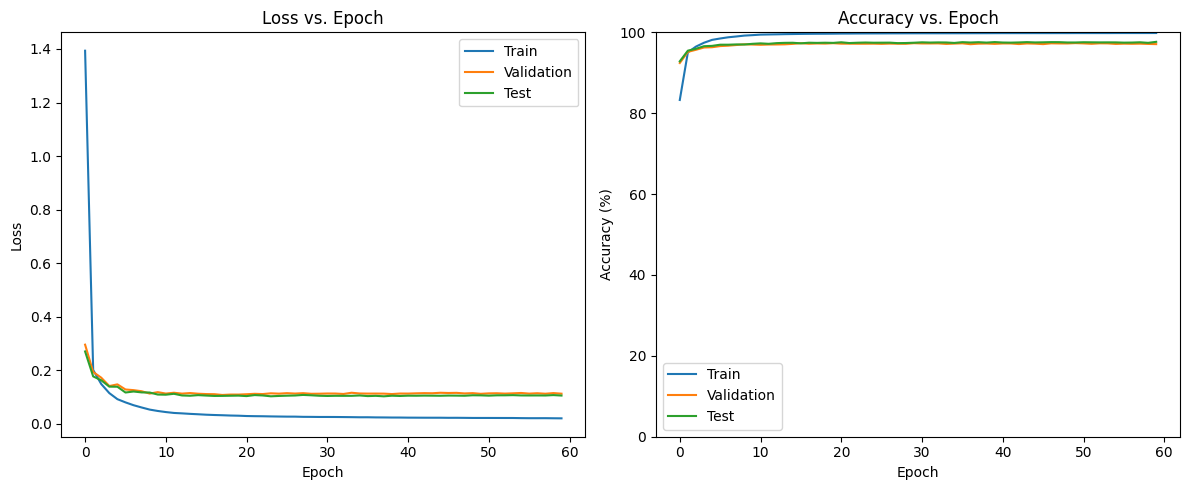

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses_q3, label='Train')
plt.plot(range(num_epochs), val_losses_q3, label='Validation')
plt.plot(range(num_epochs), test_losses_q3, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies_q3, label='Train')
plt.plot(range(num_epochs), val_accuracies_q3, label='Validation')
plt.plot(range(num_epochs), test_accuracies_q3, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epoch')
plt.ylim([0, 100])
plt.legend()
plt.tight_layout()
plt.show()

For the pytorch/custom implementation of the MLP network with ReLU activation function, the model is learning the features and thus performs good.

For the scratch implementation of the MLP network with ReLU activation function, the model is learning the features well and performs good in first few epochs only (as compared to Pytorch's implementation). 

Also, the time taken for both the scratch and pytorch implementation to train (or completing 60 epoches) are same. 
Around 1.7 and 1.8 minutes for pytorch and scratch implementation respectively.

# Question-4


## Pytorch Implementation


### Network architecture for Pytorch Implementation


In [ ]:
import torch
import time
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt


class MLP_Q4(nn.Module):
    def __init__(self, in_features:int=28*28, out_features:int=10):
        super(MLP_Q4, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=in_features, out_features=1024, bias=True)
        self.sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(in_features=1024, out_features=512, bias=True)
        self.sigmoid2 = nn.Sigmoid()
        self.fc3 = nn.Linear(in_features=512, out_features=256, bias=True)
        self.sigmoid3 = nn.Sigmoid()
        self.fc4 = nn.Linear(in_features=256, out_features=128, bias=True)
        self.sigmoid4 = nn.Sigmoid()
        self.fc5 = nn.Linear(in_features=128, out_features=out_features, bias=True)
        self.softmax5 = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid1(self.fc1(x))
        x = self.sigmoid2(self.fc2(x))
        x = self.sigmoid3(self.fc3(x))
        x = self.sigmoid4(self.fc4(x))
        logits = self.fc5(x)
        probas = self.softmax5(logits)
        return logits

### Initialize Dataset and DataLoaders

In [ ]:
# Creating training and test datasets
root = './data/MNIST/raw/'
train_dataset = MNISTCustomDataset(root=root, train=True, transform=None)
test_dataset = MNISTCustomDataset(root=root, train=False, transform=None)

# splitting of training and validation set
batch_size = 128
valid_size = 0.1
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, shuffle=False)
valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Train Dataset Length: {}'.format(len(train_sampler)))
print('Validation Dataset Length: {}'.format(len(valid_sampler)))
print('Test Dataset Length: {}'.format(len(test_dataset)))

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 10000
Dataset image shape: torch.Size([10000, 1, 28, 28])
Dataset label shape: torch.Size([10000])

Train Dataset Length: 54000
Validation Dataset Length: 6000
Test Dataset Length: 10000


### Initialization of Model and its parameters


In [ ]:
# Initialize the model
model_q4a = MLP_Q4(in_features=28*28, out_features=10)

# Define the loss function and optimizer
optimizer_q4a = optim.SGD(model_q4a.parameters(), lr=0.0003)
criterion_q4a = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Training of Model


In [ ]:
# Training loop
def train_q4a(model_q4a:nn.Module, train_loader:DataLoader, optimizer, criterion):
    model_q4a.train()
    model_q4a = model_q4a.to(device)
    train_loss = 0.0
    correct = 0
    total = 0
    batch = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_q4a(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        batch_correct = (predicted == labels).sum().item()
        correct += batch_correct

        if (batch + 1) % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(images)
            print(f"Batch Loss: {loss:>7f},  Batch Accuracy: {100*batch_correct/len(images):.2f}   [{current:>5d}/{len(train_sampler):>5d}]")
        batch += 1

    accuracy = 100 * correct / total
    train_loss = train_loss / len(train_loader)
    print(f"Training performance: \n Accuracy: {accuracy:>0.1f}%, Loss: {train_loss:>8f}")
    return train_loss, accuracy


# Validation loop
def validate_q4a(model_q4a:nn.Module, valid_loader:DataLoader, loss_fn):
    model_q4a.eval()
    model_q4a = model_q4a.to(device)
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_q4a(images)
            val_loss += loss_fn(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    val_loss = val_loss / len(valid_loader)
    print(f"Validation performance: \n Accuracy: {accuracy:>0.1f}%, Loss: {val_loss:>8f}")
    return val_loss, accuracy


# Testing loop
def test_q4a(model_q4a:nn.Module, test_loader:DataLoader, loss_fn):
    model_q4a.eval()
    model_q4a = model_q4a.to(device)
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_q4a(images)
            test_loss += loss_fn(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_loss = test_loss / len(test_loader)
    print(f"Test performance: \n Accuracy: {accuracy:>0.1f}%, Loss: {test_loss:>8f} \n")
    return test_loss, accuracy


# Training, Validation and Testing of the model
num_epochs = 60
train_losses_q4a, train_accuracies_q4a = [], []
val_losses_q4a, val_accuracies_q4a = [], []
test_losses_q4a, test_accuracies_q4a = [], []
start_time = time.time()

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loss, train_accuracy = train_q4a(model_q4a, train_loader, optimizer_q4a, criterion_q4a)
    val_loss, val_accuracy = validate_q4a(model_q4a, valid_loader, criterion_q4a)
    test_loss, test_accuracy = test_q4a(model_q4a, test_loader, criterion_q4a)

    train_losses_q4a.append(train_loss)
    train_accuracies_q4a.append(train_accuracy)
    val_losses_q4a.append(val_loss)
    val_accuracies_q4a.append(val_accuracy)
    test_losses_q4a.append(test_loss)
    test_accuracies_q4a.append(test_accuracy)

end_time = time.time()
print(f"Time taken to train the model: {(end_time - start_time) / 60} minutes")

Epoch 1
-------------------------------
Batch Loss: 2.316084,  Batch Accuracy: 12.50   [ 1280/54000]
Batch Loss: 2.328901,  Batch Accuracy: 11.72   [ 2560/54000]
Batch Loss: 2.323633,  Batch Accuracy: 10.94   [ 3840/54000]
Batch Loss: 2.338705,  Batch Accuracy: 7.03   [ 5120/54000]
Batch Loss: 2.371053,  Batch Accuracy: 3.91   [ 6400/54000]
Batch Loss: 2.351547,  Batch Accuracy: 7.81   [ 7680/54000]
Batch Loss: 2.360708,  Batch Accuracy: 7.03   [ 8960/54000]
Batch Loss: 2.333346,  Batch Accuracy: 10.16   [10240/54000]
Batch Loss: 2.336508,  Batch Accuracy: 8.59   [11520/54000]
Batch Loss: 2.328631,  Batch Accuracy: 11.72   [12800/54000]
Batch Loss: 2.329980,  Batch Accuracy: 10.16   [14080/54000]
Batch Loss: 2.318509,  Batch Accuracy: 12.50   [15360/54000]
Batch Loss: 2.338769,  Batch Accuracy: 7.81   [16640/54000]
Batch Loss: 2.342783,  Batch Accuracy: 6.25   [17920/54000]
Batch Loss: 2.305357,  Batch Accuracy: 12.50   [19200/54000]
Batch Loss: 2.343307,  Batch Accuracy: 8.59   [20480

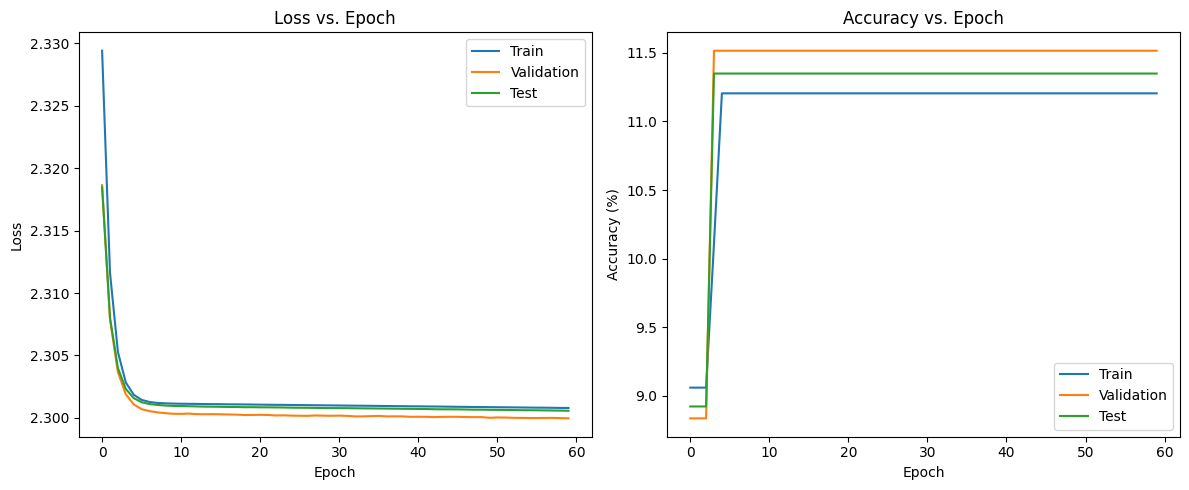

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses_q4a, label='Train')
plt.plot(range(num_epochs), val_losses_q4a, label='Validation')
plt.plot(range(num_epochs), test_losses_q4a, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies_q4a, label='Train')
plt.plot(range(num_epochs), val_accuracies_q4a, label='Validation')
plt.plot(range(num_epochs), test_accuracies_q4a, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.tight_layout()
plt.show()

## Scratch Implementation

In [ ]:
import torch
import math
import time
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from typing import List

### Model architecture for scratch implementation

In [ ]:
class MyNet:
    def __init__(self, in_features=28*28, out_features=10, device:str='cpu'):
        self.in_features = in_features
        self.out_features = out_features
        self.device = device
        self.fc1 = Linear(in_features, 1024, device=device)
        self.sigmoid1 = Sigmoid()
        self.fc2 = Linear(1024, 512, device=device)
        self.sigmoid2 = Sigmoid()
        self.fc3 = Linear(512, 256, device=device)
        self.sigmoid3 = Sigmoid()
        self.fc4 = Linear(256, 128, device=device)
        self.sigmoid4 = Sigmoid()
        self.fc5 = Linear(128, out_features, device=device)
        self.softmax = SoftMax()
        self.parameters = [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5]
        self.input_features = None

    def forward(self, x:torch.Tensor):
        self.input_features = x.clone()
        x = self.fc1.forward(x)
        x = self.sigmoid1.forward(x)
        x = self.fc2.forward(x)
        x = self.sigmoid2.forward(x)
        x = self.fc3.forward(x)
        x = self.sigmoid3.forward(x)
        x = self.fc4.forward(x)
        x = self.sigmoid4.forward(x)
        x = self.fc5.forward(x)
        x = self.softmax.forward(x)
        return x

    def backward(self, true_labels:torch.tensor):
        true_labels = torch.zeros((true_labels.size(0), 10), device=self.device).scatter_(1, true_labels.view(-1, 1), 1)
        self.fc5.error_output = torch.matmul(self.softmax.backward(self.fc5.z), (true_labels - self.softmax.activation).unsqueeze(-1)).squeeze(-1)
        self.fc5.backward(self.sigmoid4.activation)
        self.fc4.error_output = self.sigmoid4.backward(self.fc4.z) * torch.matmul(self.fc5.error_output, self.fc5.weights)
        self.fc4.backward(self.sigmoid3.activation)
        self.fc3.error_output = self.sigmoid3.backward(self.fc3.z) * torch.matmul(self.fc4.error_output, self.fc4.weights)
        self.fc3.backward(self.sigmoid2.activation)
        self.fc2.error_output = self.sigmoid2.backward(self.fc2.z) * torch.matmul(self.fc3.error_output, self.fc3.weights)
        self.fc2.backward(self.sigmoid1.activation)
        self.fc1.error_output = self.sigmoid1.backward(self.fc1.z) * torch.matmul(self.fc2.error_output, self.fc2.weights)
        self.fc1.backward(self.input_features)

### Initialize Dataset and DataLoaders

In [ ]:
# Creating training and test datasets
root = './data/MNIST/raw/'
train_dataset = MNISTCustomDataset(root=root, train=True, transform=None)
test_dataset = MNISTCustomDataset(root=root, train=False, transform=None)

# splitting of training and validation set
batch_size = 128
valid_size = 0.1
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, shuffle=False)
valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Train Dataset Length: {}'.format(len(train_sampler)))
print('Validation Dataset Length: {}'.format(len(valid_sampler)))
print('Test Dataset Length: {}\n'.format(len(test_dataset)))

for images, labels in train_loader:
    print(images.shape, labels.shape)
    print(type(images), type(labels))
    print(images.dtype, labels.dtype)
    break

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 10000
Dataset image shape: torch.Size([10000, 1, 28, 28])
Dataset label shape: torch.Size([10000])

Train Dataset Length: 54000
Validation Dataset Length: 6000
Test Dataset Length: 10000

torch.Size([128, 1, 28, 28]) torch.Size([128])
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.int64


### Intialize Custom Model, Loss and Optimizer  

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model_q4b = MyNet(in_features=28*28, out_features=10, device=device)
sgd_optimizer_q4b = SGD(model_q4b.parameters, lr=0.0003)
ce_loss_q4b = CrossEntropyLoss()

cuda:0


### Training of the Model

In [ ]:
# Training loop
def train_Q4b(model_custom:MyNet, train_loader:DataLoader, sgd_optimizer:SGD, ce_loss:CrossEntropyLoss):
    train_loss = 0.0
    correct = 0
    total = 0
    batch = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        sgd_optimizer.zero_grad()
        images = images.view(images.size(0), -1)
        output = model_custom.forward(images)
        loss = ce_loss.forward(output, labels)
        ce_loss.backward(model_custom, labels)
        sgd_optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(output, 1)
        batch_correct = (predicted == labels).sum().item()
        total += labels.size(0)
        correct += batch_correct
        batch_accuracy = 100 * batch_correct / len(images)
        if (batch + 1) % 10 == 0:
            current = (batch + 1) * len(images)
            print(f"Batch loss: {loss.item():>7f},  Batch Accuracy: {batch_accuracy:>0.2f}  [{current:>5d}/{len(train_sampler):>5d}]")
        batch += 1

    accuracy = 100 * correct / total
    train_loss /= len(train_loader)
    print(f"Training performance:\n Accuracy: {accuracy:.2f}%, Loss: {train_loss:.4f}")
    return train_loss, accuracy

# Validation loop
def validate_Q4b(model_custom:MyNet, valid_loader:DataLoader, ce_loss:CrossEntropyLoss):
    val_loss = 0.0
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)
        output = model_custom.forward(images)
        loss = ce_loss.forward(output, labels)
        val_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    val_loss /= len(valid_loader)
    print(f"Validation performance:\n Accuracy: {accuracy:.2f}%, Loss: {val_loss:.4f}")
    return val_loss, accuracy

# Testing loop
def test_Q4b(model_custom:MyNet, test_loader:DataLoader, ce_loss:CrossEntropyLoss):
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.size(0), -1)
        output = model_custom.forward(images)
        loss = ce_loss.forward(output, labels)
        test_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss /= len(test_loader)
    print(f"Test performance: Accuracy:\n {accuracy:.2f}%, Loss: {test_loss:.4f}")
    return test_loss, accuracy

# Training, Validation, and Testing of the model_custom
train_losses_q4b, train_accuracies_q4b = [], []
val_losses_q4b, val_accuracies_q4b = [], []
test_losses_q4b, test_accuracies_q4b = [], []
start_time = time.time()
num_epochs = 60

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loss, train_acc = train_Q4b(model_q4b, train_loader, sgd_optimizer_q4b, ce_loss_q4b)
    val_loss, val_acc = validate_Q4b(model_q4b, valid_loader, ce_loss_q4b)
    test_loss, test_acc = test_Q4b(model_q4b, test_loader, ce_loss_q4b)

    train_losses_q4b.append(train_loss)
    train_accuracies_q4b.append(train_acc)
    val_losses_q4b.append(val_loss)
    val_accuracies_q4b.append(val_acc)
    test_losses_q4b.append(test_loss)
    test_accuracies_q4b.append(test_acc)

end_time = time.time()
print(f'Total time taken to Train: {(end_time - start_time) / 60} mins')

Epoch 1
-------------------------------
Batch loss: 2.355545,  Batch Accuracy: 9.38  [ 1280/54000]
Batch loss: 2.344710,  Batch Accuracy: 10.16  [ 2560/54000]
Batch loss: 2.382210,  Batch Accuracy: 5.47  [ 3840/54000]
Batch loss: 2.348142,  Batch Accuracy: 10.16  [ 5120/54000]
Batch loss: 2.290088,  Batch Accuracy: 15.62  [ 6400/54000]
Batch loss: 2.321336,  Batch Accuracy: 9.38  [ 7680/54000]
Batch loss: 2.320848,  Batch Accuracy: 10.16  [ 8960/54000]
Batch loss: 2.326009,  Batch Accuracy: 10.16  [10240/54000]
Batch loss: 2.286733,  Batch Accuracy: 14.06  [11520/54000]
Batch loss: 2.317568,  Batch Accuracy: 12.50  [12800/54000]
Batch loss: 2.314056,  Batch Accuracy: 10.16  [14080/54000]
Batch loss: 2.297371,  Batch Accuracy: 9.38  [15360/54000]
Batch loss: 2.294428,  Batch Accuracy: 12.50  [16640/54000]
Batch loss: 2.313814,  Batch Accuracy: 6.25  [17920/54000]
Batch loss: 2.304512,  Batch Accuracy: 8.59  [19200/54000]
Batch loss: 2.291830,  Batch Accuracy: 15.62  [20480/54000]
Batch 

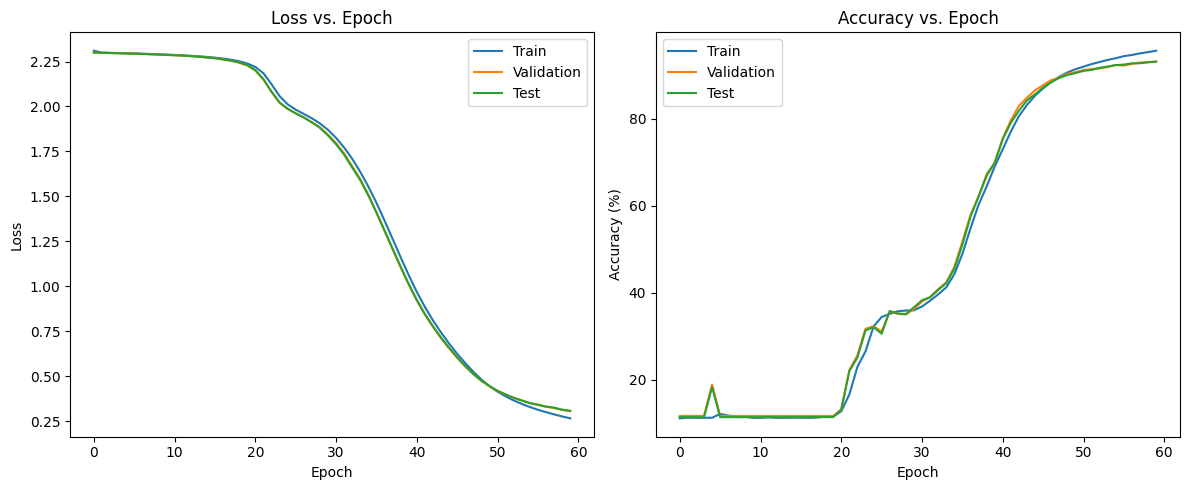

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses_q4b, label='Train')
plt.plot(range(num_epochs), val_losses_q4b, label='Validation')
plt.plot(range(num_epochs), test_losses_q4b, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies_q4b, label='Train')
plt.plot(range(num_epochs), val_accuracies_q4b, label='Validation')
plt.plot(range(num_epochs), test_accuracies_q4b, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.tight_layout()
plt.show()

For the custom implementation of the MLP network with sigmoid activation function, the model is not able to learn the features and thus performs poorly due to change in activation from ReLU (linear) to Sigmoid (weighted & scaled over outputs). However, i observed the with higher learning rate, the same model is able to learn the features and perform better beacuse of the faster speed of convergence. 

For the scratch implementation of the MLP network with sigmoid activation function, the model is learning the features and thus performing good. However, this is happening only after 20-30 epoches. It seems model is taking more time to train as compared to ReLU activation function. 

Also, the time taken for both the scratch and pytorch implementation to train (or completing 60 epoches) are same. 
Around 1.8 minutes for both.

# BONUS Question-1

### Network architecture

In [24]:
import torch
import time
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt


class MLP_Bonus(nn.Module):
    def __init__(self, in_features:int=28*28, out_features:int=10):
        super(MLP_Bonus, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=in_features, out_features=512, bias=True)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=512, out_features=512, bias=True)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=512, out_features=1024, bias=True)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(in_features=1024, out_features=1024, bias=True)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(in_features=1024, out_features=2048, bias=True)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(in_features=2048, out_features=2048, bias=True)
        self.relu6 = nn.ReLU()
        # self.fc7 = nn.Linear(in_features=2048, out_features=2048, bias=True)
        # self.relu7 = nn.ReLU()
        # self.fc8 = nn.Linear(in_features=1024, out_features=1024, bias=True)
        # self.relu8 = nn.ReLU()
        # self.fc9 = nn.Linear(in_features=1024, out_features=1024, bias=True)
        # self.relu9 = nn.ReLU()
        # self.fc10 = nn.Linear(in_features=1024, out_features=1024, bias=True)
        # self.relu10 = nn.ReLU()
        # self.fc11 = nn.Linear(in_features=1024, out_features=1024, bias=True)
        # self.relu11 = nn.ReLU()
        self.fc12 = nn.Linear(in_features=2048, out_features=2048, bias=True)
        self.relu12 = nn.ReLU()
        self.fc13 = nn.Linear(in_features=2048, out_features=1024, bias=True)
        self.relu13 = nn.ReLU()
        self.fc14 = nn.Linear(in_features=1024, out_features=512, bias=True)
        self.relu14 = nn.ReLU()
        self.fc15 = nn.Linear(in_features=512, out_features=512, bias=True)
        self.relu15 = nn.ReLU()
        self.fc16 = nn.Linear(in_features=512, out_features=out_features, bias=True)
        self.softmax16 = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.relu5(self.fc5(x))
        x = self.relu6(self.fc6(x))
        # x = self.relu7(self.fc7(x))
        # x = self.relu8(self.fc8(x))
        # x = self.relu9(self.fc9(x))
        # x = self.relu10(self.fc10(x))
        # x = self.relu11(self.fc11(x))
        x = self.relu12(self.fc12(x))
        x = self.relu13(self.fc13(x))
        x = self.relu14(self.fc14(x))
        x = self.relu15(self.fc15(x))
        logits = self.fc16(x)
        probas = self.softmax16(logits)
        return logits

### Initialize DataSet and DataLoaders

In [25]:
# Creating training and test datasets
root = './data/MNIST/raw/'
train_dataset = MNISTCustomDataset(root=root, train=True, transform=None)
test_dataset = MNISTCustomDataset(root=root, train=False, transform=None)

# splitting of training and validation set
batch_size = 128
valid_size = 0.1
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, shuffle=False)
valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print('Train Dataset Length: {}'.format(len(train_sampler)))
print('Validation Dataset Length: {}'.format(len(valid_sampler)))
print('Test Dataset Length: {}'.format(len(test_dataset)))

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 60000
Dataset image shape: torch.Size([60000, 1, 28, 28])
Dataset label shape: torch.Size([60000])

MNIST Custom Dataset Initialized...
MNIST Custom Dataset length: 10000
Dataset image shape: torch.Size([10000, 1, 28, 28])
Dataset label shape: torch.Size([10000])

Train Dataset Length: 54000
Validation Dataset Length: 6000
Test Dataset Length: 10000


### Initialization of Model and its parameters


In [29]:
# Initialize the model
model_bonus = MLP_Bonus()

# Define the loss function and optimizer
optimizer_bonus = optim.SGD(model_bonus.parameters(), lr=0.0003)
criterion_bonus = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Training of the Model

In [30]:
# Training loop
def train_bonus(model:nn.Module, train_loader:DataLoader, optimizer, criterion):
    model.train()
    model = model.to(device)
    train_loss = 0.0
    correct = 0
    total = 0
    batch = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        batch_correct = (predicted == labels).sum().item()
        correct += batch_correct

        if (batch + 1) % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(images)
            print(f"Batch Loss: {loss:>7f},  Batch Accuracy: {100*batch_correct/len(images):.2f}   [{current:>5d}/{len(train_sampler):>5d}]")
        batch += 1

    accuracy = 100 * correct / total
    train_loss = train_loss / len(train_loader)
    print(f"Training performance: \n Accuracy: {accuracy:>0.1f}%, Loss: {train_loss:>8f}")
    return train_loss, accuracy


# Validation loop
def validate_bonus(model:nn.Module, valid_loader:DataLoader, loss_fn):
    model.eval()
    model = model.to(device)
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss += loss_fn(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    val_loss = val_loss / len(valid_loader)
    print(f"Validation performance: \n Accuracy: {accuracy:>0.1f}%, Loss: {val_loss:>8f}")
    return val_loss, accuracy


# Testing loop
def test_bonus(model:nn.Module, test_loader:DataLoader, loss_fn):
    model.eval()
    model = model.to(device)
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            test_loss += loss_fn(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_loss = test_loss / len(test_loader)
    print(f"Test performance: \n Accuracy: {accuracy:>0.1f}%, Loss: {test_loss:>8f} \n")
    return test_loss, accuracy


# Training, Validation and Testing of the model
num_epochs = 60
train_losses_bonus, train_accuracies_bonus = [], []
val_losses_bonus, val_accuracies_bonus = [], []
test_losses_bonus, test_accuracies_bonus = [], []
start_time = time.time()

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loss, train_acc = train_bonus(model_bonus, train_loader, optimizer_bonus, criterion_bonus)
    val_loss, val_acc = validate_bonus(model_bonus, valid_loader, criterion_bonus)
    test_loss, test_acc = test_bonus(model_bonus, test_loader, criterion_bonus)

    train_losses_bonus.append(train_loss)
    train_accuracies_bonus.append(train_acc)
    val_losses_bonus.append(val_loss)
    val_accuracies_bonus.append(val_acc)
    test_losses_bonus.append(test_loss)
    test_accuracies_bonus.append(test_acc)

end_time = time.time()
print(f"Time taken to train the model: {(end_time - start_time) / 60} minutes")

Epoch 1
-------------------------------
Batch Loss: 2.304476,  Batch Accuracy: 10.16   [ 1280/54000]
Batch Loss: 2.307714,  Batch Accuracy: 9.38   [ 2560/54000]
Batch Loss: 2.303729,  Batch Accuracy: 10.16   [ 3840/54000]
Batch Loss: 2.304481,  Batch Accuracy: 5.47   [ 5120/54000]
Batch Loss: 2.301047,  Batch Accuracy: 14.84   [ 6400/54000]
Batch Loss: 2.301868,  Batch Accuracy: 14.84   [ 7680/54000]
Batch Loss: 2.301548,  Batch Accuracy: 8.59   [ 8960/54000]
Batch Loss: 2.303400,  Batch Accuracy: 8.59   [10240/54000]
Batch Loss: 2.304098,  Batch Accuracy: 10.94   [11520/54000]
Batch Loss: 2.302260,  Batch Accuracy: 13.28   [12800/54000]
Batch Loss: 2.302326,  Batch Accuracy: 7.03   [14080/54000]
Batch Loss: 2.302458,  Batch Accuracy: 12.50   [15360/54000]
Batch Loss: 2.302103,  Batch Accuracy: 9.38   [16640/54000]
Batch Loss: 2.302757,  Batch Accuracy: 10.94   [17920/54000]
Batch Loss: 2.303371,  Batch Accuracy: 10.94   [19200/54000]
Batch Loss: 2.301843,  Batch Accuracy: 14.84   [204

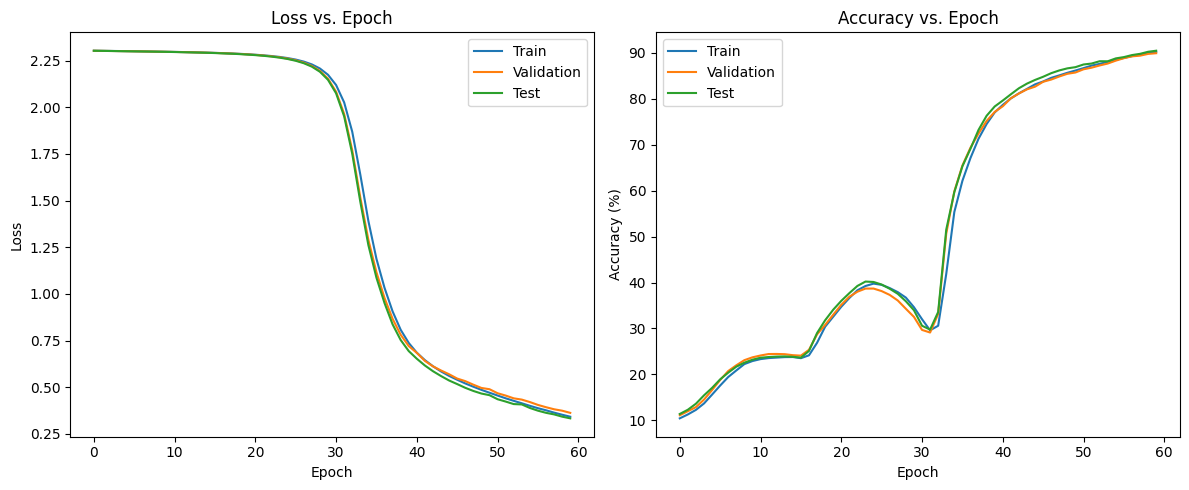

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses_bonus, label='Train')
plt.plot(range(num_epochs), val_losses_bonus, label='Validation')
plt.plot(range(num_epochs), test_losses_bonus, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies_bonus, label='Train')
plt.plot(range(num_epochs), val_accuracies_bonus, label='Validation')
plt.plot(range(num_epochs), test_accuracies_bonus, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.tight_layout()
plt.show()

Highest value of 'n' achieved is 10. After 10 layers, the model is not able to learn the features and thus performs poorly due to increased complexity of the model and parameters.